# diabete DL Regression

Using DL Dense, MSE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/anchanghun/Downloads/diabetes.csv")

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
x= df.drop('Outcome',axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [4]:
y = x['BMI']

In [5]:
x= x.drop(columns=['BMI'],axis=1)

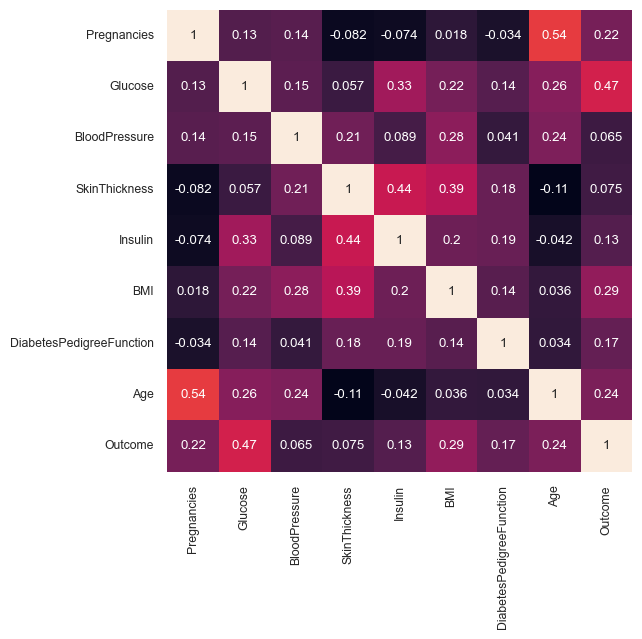

In [6]:

df_corr=df.corr()

#히트맵
plt.figure(figsize=(6,6))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [7]:

X = x.values
X
     

array([[  6.   , 148.   ,  72.   , ...,   0.   ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,   0.   ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ..., 112.   ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,   0.   ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.   ,   0.315,  23.   ]])

In [8]:
y


0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [9]:
from sklearn.preprocessing import StandardScaler
# 특성 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [11]:
y_train

603    35.2
118    28.2
247    52.3
157    25.2
468    30.0
       ... 
763    32.9
192    30.4
629    24.7
559    30.1
684     0.0
Name: BMI, Length: 614, dtype: float64

In [12]:

#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

def model_fn(a_layer=None):

    model = keras.Sequential()
    model.add(Dense(10, input_shape=(7,), activation='tanh'))
    model.add(Dense(15, activation='tanh'))
    model.add(Dense(15, activation='tanh'))
    if a_layer:
      model.add(a_layer)
    model.add(keras.layers.Dense(1))
    return model
     

In [13]:
model = model_fn()

model.compile(optimizer = 'Adam', loss ='mse',metrics=['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dense_1 (Dense)             (None, 15)                165       
                                                                 
 dense_2 (Dense)             (None, 15)                240       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 501 (1.96 KB)
Trainable params: 501 (1.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
20/20 [==============================] - 0s 3ms/step - loss: 1114.4286 - mse: 1114.4286 - val_loss: 1018.8738 - val_mse: 1018.8738
Epoch 2/10
20/20 [==============================] - 0s 743us/step - loss: 1064.6807 - mse: 1064.6807 - val_loss: 969.8439 - val_mse: 969.8439
Epoch 3/10
20/20 [==============================] - 0s 828us/step - loss: 1010.3994 - mse: 1010.3994 - val_loss: 911.9499 - val_mse: 911.9499
Epoch 4/10
20/20 [==============================] - 0s 852us/step - loss: 949.1398 - mse: 949.1398 - val_loss: 850.2215 - val_mse: 850.2215
Epoch 5/10
20/20 [==============================] - 0s 870us/step - loss: 889.7165 - mse: 889.7165 - val_loss: 798.2625 - val_mse: 798.2625
Epoch 6/10
20/20 [==============================] - 0s 910us/step - loss: 840.4199 - mse: 840.4199 - val_loss: 756.5950 - val_mse: 756.5950
Epoch 7/10
20/20 [==============================] - 0s 846us/step - loss: 802.1939 - mse: 802.1939 - val_loss: 724.6720 - val_mse: 724.6720
Epoch 8/10
20/

In [15]:
y_pred

array([[6.767516 ],
       [6.7622685],
       [6.7680173],
       [6.7622685],
       [6.76781  ],
       [6.7680173],
       [6.7622685],
       [6.7622685],
       [6.7622676],
       [6.7622685],
       [6.7622685],
       [6.7622685],
       [6.7680173],
       [6.7622685],
       [6.7680154],
       [6.7680173],
       [6.7622685],
       [6.7680173],
       [6.7680173],
       [6.7622685],
       [6.7680173],
       [6.7680173],
       [6.4242325],
       [6.674539 ],
       [6.7622685],
       [6.7680173],
       [6.7680173],
       [6.7622685],
       [6.7680173],
       [6.7680173],
       [6.7622685],
       [6.7622685],
       [6.7622685],
       [6.7622685],
       [6.7680173],
       [6.6080623],
       [6.7622685],
       [6.7680173],
       [6.7622685],
       [6.7680173],
       [6.7622685],
       [6.7680173],
       [6.7680173],
       [6.7554326],
       [6.5918727],
       [6.7680173],
       [6.76802  ],
       [6.7622685],
       [6.7622685],
       [6.7680173],


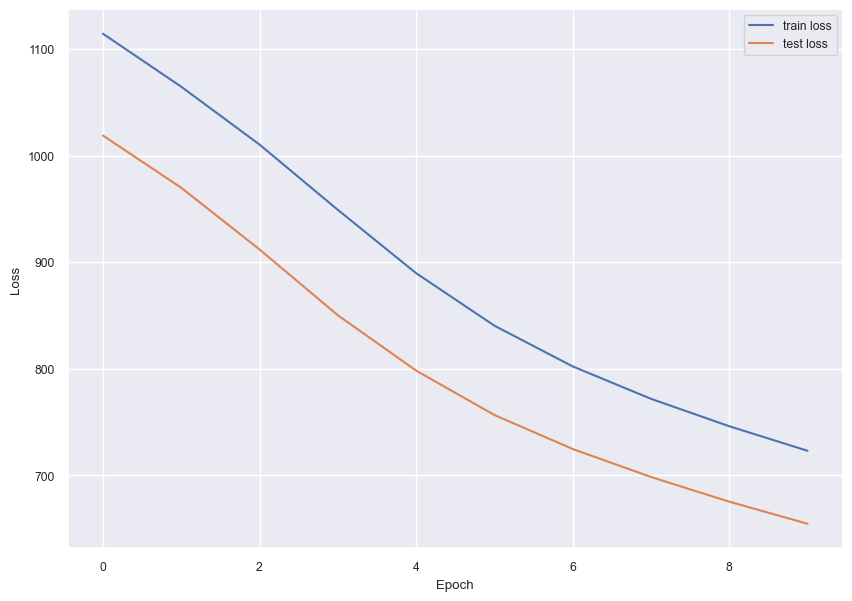

In [16]:

# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:

from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_pred, y_test))
print('평균제곱근오차', mse)
     

평균제곱근오차 25.583096049725956


In [18]:
model.evaluate(X_test, y_test)
     

5/5 [==============================] - 0s 873us/step - loss: 654.4948 - mse: 654.4948


[654.4948120117188, 654.4948120117188]

In [19]:

# 두 콜백을 함께 사용

N_EPOCHS = 20

model = model_fn(keras.layers.Dropout(0.2))
model.compile(optimizer='Adam', loss='mse',
              metrics=['mse'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(x=X_train,y=y_train, epochs=N_EPOCHS, batch_size=4, verbose=0,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb])

y_pred = model.predict(X_test)

/Users/anchanghun/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 0s 424us/step


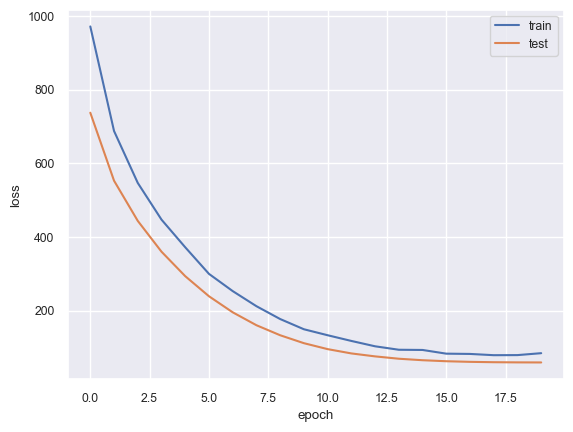

In [20]:

# 훈련 손실과 검증 손실 출력

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()


In [21]:

mse = np.sqrt(mean_squared_error(y_pred, y_test))
print('평균 제곱근 오차', mse)
     

평균 제곱근 오차 7.707495475514844


In [22]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 585us/step - loss: 59.4055 - mse: 59.4055


[59.40549087524414, 59.40549087524414]